## Chapter 4 (p.125 ~ p.180)

### [1] 퍼셉트론


#### [1-1] 가중 합 계산

In [1]:
import numpy as np

In [2]:
def add_weight(x, w):
    return sum(x * w)

In [3]:
weight = np.array([-0.5, 1, 1])
x = np.array([1, 0, 1])

add_weight(x, weight)

0.5

In [4]:
def add_weight(x, w):
    return np.sum(x * w, axis=1)

In [5]:
x = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

add_weight(x, weight)

array([-0.5,  0.5,  0.5,  1.5])

#### [1-2] Sklearn 이용한 퍼셉트론

In [6]:
from sklearn.linear_model import Perceptron

In [7]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, 1]

p = Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론 매개변수 : ", p.coef_, p.intercept_)
print("예측 : ", p.predict(X))
print("정확도 : ", p.score(X, y)*100)

학습된 퍼셉트론 매개변수 :  [[2. 2.]] [-1.]
예측 :  [-1  1  1  1]
정확도 :  100.0


#### [1-3] 필기 숫자에 퍼셉트론 적용

* 숫자 맞추기 => classification => 혼동 행렬 사용

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


# [1] 먼저 dataset load하기
digits = datasets.load_digits()

# [2] train-test split
X_train, X_val, y_train, y_val = train_test_split(digits.data, digits.target, train_size=0.7)

# [3] 모델 설정 및 학습
p = Perceptron()
p.fit(X_train, y_train)

# [4] 모델 예측
pred = p.predict(X_val)

# [5] 혼동 행렬
conf = np.zeros((10, 10)) # 숫자는 0 ~ 9

for i in range(len(pred)):
    conf[pred[i]][y_val[i]] += 1

print("혼동 행렬 : ", conf)

# [5] 성능 측정
accuracy = 0
for i in range(10):
    accuracy += conf[i][i]
print("accuracy : ", accuracy/len(pred)*100)


혼동 행렬 :  [[48.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 53.  0.  0.  0.  0.  0.  0.  2.  1.]
 [ 0.  0. 50.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  2. 50.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  1.  0. 60.  1.  1.  1.  1.]
 [ 0.  1.  0.  0.  0.  1. 54.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 54.  0.  0.]
 [ 0.  3.  0.  2.  3.  0.  0.  0. 47.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  1.  0. 47.]]
accuracy :  94.25925925925925


### [2] 다층 퍼셉트론

#### [2-1] 필기 숫자에 다층 퍼셉트론 적용

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [10]:

# [1] 먼저 dataset load하기
digits = datasets.load_digits()

# [2] train-test split
X_train, X_val, y_train, y_val = train_test_split(digits.data, digits.target, train_size=0.7)

# [3] 모델 설정 및 학습
mlp = MLPClassifier(
    hidden_layer_sizes = (100),
    learning_rate_init = 0.001,
    batch_size = 32, 
    max_iter = 300,
    solver = 'sgd', # Stochastic Gradient Descent => 한 번의 파라미터 업데이트를 위해 하나의 훈련 데이터 사용
    verbose = True
)
mlp.fit(X_train, y_train)

# [4] 모델 예측
pred = mlp.predict(X_val)

# [5] 혼동 행렬
conf = np.zeros((10, 10)) # 숫자는 0 ~ 9

for i in range(len(pred)):
    conf[pred[i]][y_val[i]] += 1

print("혼동 행렬 : ", conf)

# [5] 성능 측정
accuracy = 0
for i in range(10):
    accuracy += conf[i][i]
print("accuracy : ", accuracy/len(pred)*100)


Iteration 1, loss = 1.99235077
Iteration 2, loss = 0.28886256
Iteration 3, loss = 0.19123033
Iteration 4, loss = 0.14703939
Iteration 5, loss = 0.12514432
Iteration 6, loss = 0.09983180
Iteration 7, loss = 0.08986335
Iteration 8, loss = 0.07664083
Iteration 9, loss = 0.06818494
Iteration 10, loss = 0.06195242
Iteration 11, loss = 0.05630108
Iteration 12, loss = 0.05317478
Iteration 13, loss = 0.04920228
Iteration 14, loss = 0.04424787
Iteration 15, loss = 0.04117582
Iteration 16, loss = 0.03727866
Iteration 17, loss = 0.03522711
Iteration 18, loss = 0.03422395
Iteration 19, loss = 0.03118713
Iteration 20, loss = 0.03051381
Iteration 21, loss = 0.03014096
Iteration 22, loss = 0.02668531
Iteration 23, loss = 0.02523074
Iteration 24, loss = 0.02380869
Iteration 25, loss = 0.02401279
Iteration 26, loss = 0.02229031
Iteration 27, loss = 0.02123537
Iteration 28, loss = 0.01982369
Iteration 29, loss = 0.01963795
Iteration 30, loss = 0.01894697
Iteration 31, loss = 0.01823649
Iteration 32, los

#### [2-2] MNIST에 다층 퍼셉트론 적용

* 기존 데이터 셋 : 샘플 1797개, 8*8 데이터 맵
* MNIST : 샘플 70000개, 28*28 데이터 맵

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [12]:
# [1] data load
mnist = fetch_openml('mnist_784')

In [13]:
mnist.data = mnist.data/255.0
X_train = mnist.data[:60000]
X_val = mnist.data[60000:]

y_train =np.int16(mnist.target[:60000])
y_val = np.int16(mnist.target[60000:])

In [14]:
# [3] 모델 설정 및 학습
mlp = MLPClassifier(
    hidden_layer_sizes = (100),
    learning_rate_init = 0.001,
    batch_size = 64, 
    max_iter = 300,
    activation='relu',
    solver = 'sgd', # Stochastic Gradient Descent => 한 번의 파라미터 업데이트를 위해 하나의 훈련 데이터 사용
    verbose = True
)
mlp.fit(X_train, y_train)

# [4] 모델 예측
pred = mlp.predict(X_val)

Iteration 1, loss = 0.92291204
Iteration 2, loss = 0.42965271
Iteration 3, loss = 0.36342151
Iteration 4, loss = 0.33006809
Iteration 5, loss = 0.30727047
Iteration 6, loss = 0.28973820
Iteration 7, loss = 0.27505869
Iteration 8, loss = 0.26223752
Iteration 9, loss = 0.25115236
Iteration 10, loss = 0.24113923
Iteration 11, loss = 0.23205889
Iteration 12, loss = 0.22382421
Iteration 13, loss = 0.21608971
Iteration 14, loss = 0.20901141
Iteration 15, loss = 0.20245036
Iteration 16, loss = 0.19640533
Iteration 17, loss = 0.19071948
Iteration 18, loss = 0.18494821
Iteration 19, loss = 0.17983288
Iteration 20, loss = 0.17509667
Iteration 21, loss = 0.17047378
Iteration 22, loss = 0.16594587
Iteration 23, loss = 0.16186649
Iteration 24, loss = 0.15797090
Iteration 25, loss = 0.15406724
Iteration 26, loss = 0.15047790
Iteration 27, loss = 0.14704297
Iteration 28, loss = 0.14381944
Iteration 29, loss = 0.14058989
Iteration 30, loss = 0.13751323
Iteration 31, loss = 0.13463819
Iteration 32, los

In [15]:
# [5] 혼동 행렬
conf = np.zeros((10, 10), dtype=np.int16) # 숫자는 0 ~ 9

for i in range(len(pred)):
    conf[pred[i]][y_val[i]] += 1

print("혼동 행렬 : ", conf)

# [5] 성능 측정
accuracy = 0
for i in range(10):
    accuracy += conf[i][i]
print("accuracy : ", accuracy/len(pred)*100)

혼동 행렬 :  [[ 966    0    2    0    2    2    4    1    4    1]
 [   0 1121    2    0    0    0    3    5    0    3]
 [   1    3 1008    3    2    0    2    6    4    0]
 [   1    1    3  990    1   10    1    4    8    4]
 [   0    0    3    2  960    1    2    2    2    6]
 [   3    1    0    2    0  864    4    0    4    2]
 [   5    3    3    0    3    7  940    0    2    1]
 [   1    1    5    2    2    0    1 1003    4    2]
 [   2    5    6    4    0    6    1    0  944    2]
 [   1    0    0    7   12    2    0    7    2  988]]
accuracy :  97.84


## [3] 하이퍼 매개변수 최적화

#### [3-1] 단일 하이퍼 매개변수 최적화

* validation_curve 함수 사용

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
# [1] 데이터 셋 불러오기
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.7)


In [19]:
# [2] 다층 퍼셉트론을 교차 검증으로 성능 평가
start = time.time()
mlp = MLPClassifier(
    learning_rate_init=0.001,
    batch_size = 32,
    max_iter=300,
    solver='sgd'
)
prange = range(50, 1001, 50)
train_score, test_score = validation_curve(
    mlp, x_train, y_train, param_name = 'hidden_layer_sizes',
    param_range=prange, cv=10,
    scoring='accuracy',
    n_jobs=4
)
end = time.time()
print("하이퍼 매개변수 최적화 걸린 시간 ; ", end-start)

하이퍼 매개변수 최적화 걸린 시간 ;  146.91457295417786


In [20]:
# [3] 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

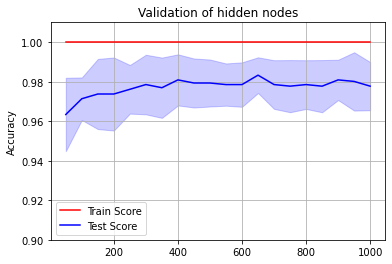

In [21]:
# [4] 성능 그래프
plt.plot(prange, train_mean, label="Train Score", color="r")
plt.plot(prange, test_mean, label="Test Score", color="b")

plt.fill_between(prange, train_mean - train_std, train_mean+train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean - test_std, test_mean+test_std, alpha=0.2, color="b")

plt.legend(loc="best")
plt.title("Validation of hidden nodes")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

In [22]:
best_number_nodes = prange[np.argmax(test_mean)]
print('최적의 히든 노드 개수 : ', best_number_nodes)

최적의 히든 노드 개수 :  650


In [23]:
# [5] 최적의 히든 노드 개수로 모델링 및 학습
mlp = MLPClassifier(
    hidden_layer_sizes = best_number_nodes,
    learning_rate_init = 0.001,
    batch_size = 32, 
    max_iter = 300,
    solver = 'sgd', # Stochastic Gradient Descent => 한 번의 파라미터 업데이트를 위해 하나의 훈련 데이터 사용
    verbose = True
)
mlp.fit(x_train, y_train)


Iteration 1, loss = 0.98854420
Iteration 2, loss = 0.15014352
Iteration 3, loss = 0.09569034
Iteration 4, loss = 0.07070479
Iteration 5, loss = 0.05807992
Iteration 6, loss = 0.05233018
Iteration 7, loss = 0.04424900
Iteration 8, loss = 0.03899632
Iteration 9, loss = 0.03481230
Iteration 10, loss = 0.03005561
Iteration 11, loss = 0.03134834
Iteration 12, loss = 0.02696145
Iteration 13, loss = 0.02517628
Iteration 14, loss = 0.02218653
Iteration 15, loss = 0.02070481
Iteration 16, loss = 0.02270437
Iteration 17, loss = 0.01826513
Iteration 18, loss = 0.01943758
Iteration 19, loss = 0.01697456
Iteration 20, loss = 0.01628660
Iteration 21, loss = 0.01495094
Iteration 22, loss = 0.01525563
Iteration 23, loss = 0.01399552
Iteration 24, loss = 0.01299555
Iteration 25, loss = 0.01346369
Iteration 26, loss = 0.01287884
Iteration 27, loss = 0.01194657
Iteration 28, loss = 0.01144062
Iteration 29, loss = 0.01098056
Iteration 30, loss = 0.01147946
Iteration 31, loss = 0.01039280
Iteration 32, los

MLPClassifier(batch_size=32, hidden_layer_sizes=650, max_iter=300, solver='sgd',
              verbose=True)

In [25]:
# [6] 모델 예측
pred = mlp.predict(x_test)

# [7] 혼동 행렬
conf = np.zeros((10, 10)) # 숫자는 0 ~ 9

for i in range(len(pred)):
    conf[pred[i]][y_test[i]] += 1

print("혼동 행렬 : ", conf)

# [5] 성능 측정
accuracy = 0
for i in range(10):
    accuracy += conf[i][i]
print("accuracy : ", accuracy/len(pred)*100)


혼동 행렬 :  [[61.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 46.  1.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0. 53.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 59.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 55.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 53.  2.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 45.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 52.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. 43.  2.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0. 55.]]
accuracy :  96.66666666666667
